# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [170]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# SELV
import itertools as it
import scipy
from scipy import optimize 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [106]:
##We define the function

In [220]:
# We define the variables, where we set w=1, in order to try the code.
m = 1
w = 1
v = 10
e = 0.3
tau_0 = 0.4
tau_1 = 0.1
k = 0.4

# We define the utility function:
def utility(c,l,v,e):
    u = np.log(c) - v*(l**(1+(1/e))/(1+(1/e)))
    return u

# We define the constraint
def constraint(m,w,l,tau_0,tau_1,k):
    x = m + w*l - (tau_0*w*l + tau_1*np.max(w*l-k,0))
    return x

# We define the consumption choice as a function of the constraint
def choice(l,w,e,v,tau_0,tau_1,k,m):
    c = constraint(m,w,l,tau_0,tau_1,k)
    return -utility(c,l,v,e)

# We define the function in order to determine the laboursupply and consumption optimizing output
def optimizer(w,e,v,tau_0,tau_1,k,m,do_print=False):
    result = opt.minimize_scalar(choice, method='bounded',bounds=(0,1), args=(w,e,v,tau_0,tau_1,k,m))
    
    l_opt = result.x
    c_opt = constraint(m,w,l_opt,tau_0,tau_1,k)
    u_opt = utility(c_opt,l_opt,v,e)
    
    if do_print:
        print(f'l_opt = {l_opt:4f}')
        print(f'c_opt = {c_opt:4f}')
        print(f'u_opt = {u_opt:4f}')
    return l_opt,c_opt,u_opt

In [226]:
optimizer(w,e,v,tau_0,tau_1,k,m)

(0.419717360264909, 1.3547880201986817, 0.25002527087218335)

In [232]:
l_opt=optimizer(w,e,v,tau_0,tau_1,k,m)[0]
print(l_opt)
c_opt=optimizer(w,e,v,tau_0,tau_1,k,m)[1]
print(c_opt)
u_opt=optimizer(w,e,v,tau_0,tau_1,k,m)[2]
print(u_opt)

0.419717360264909
1.3547880201986817
0.25002527087218335


# Question 2

ADD ANSWER.

In [187]:
#SVAR ved w=1
optimizer(w,e,v,tau_0,tau_1,k,m,do_print=True)

l_opt = 0.382463
c_opt = 1.231232
u_opt = 0.172172


(0.3824630518597855, 1.2312315259298927, 0.17217235004531845)

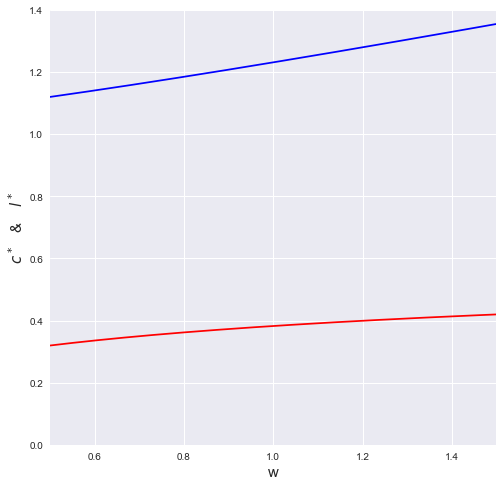

In [223]:
#We set the population to 10.000:
N=100000
#We create a vector for all values between 0.5-1.5 for the 10.0000 people:
w_vec = np.linspace(0.5, 1.5, N)
#Then we create to empty vectors for l and c in the same size:
l_vec = np.empty(N)
c_vec = np.empty(N)
#Then we run our optimizer code with the different w

for i,w in enumerate(w_vec) :
    bundle=optimizer(w,e,v,tau_0,tau_1,k,m)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

fig=plt.figure(figsize=(8,8))
ax=ax = fig.add_subplot(1,1,1)
ax.plot(w_vec, l_vec, color='red')
ax.plot(w_vec, c_vec, color='blue')
ax.set_xlabel('w',size=15)
ax.set_ylabel('$c^*$   &    $l^*$', size=15)
ax.set_xlim([0.5,1.5])
ax.set_ylim([0,1.4])
ax.grid(True)


# Question 3

ADD ANSWER.

In [245]:
# code
#T
N=10
np.random.seed(1032)
wi_vec1 = np.random.uniform(0.5,1.5,size=N)
l_vec1 = np.zeros(N)
c_vec1 = np.zeros(N)
for i,w in enumerate(w_vec) :
    OPT=optimizer(w,e,v,tau_0,tau_1,k,m)
    l_vec1[i]=OPT[0]

total_tax= lambda l_vec1,wi_vec1: tau_0*wi_vec1*l_vec1+tau_1*np.max(wi_vec1*l_vec1-k,0)
tax=total_tax(l_vec1,wi_vec1)
print(np.sum(tax))



IndexError: index 10 is out of bounds for axis 0 with size 10

In [250]:
# code
#T
N=10
np.random.seed(1032)
wi_vec1 = np.random.uniform(0.5,1.5,size=N)
l_vec1 = np.zeros(N)
c_vec1 = np.zeros(N)
for i,w in enumerate(w_vec) :
    OPT=optimizer(w,e,v,tau_0,tau_1,k,m)
    l_vec1[i]=OPT[0]

total_tax= lambda l_vec1,wi_vec1: tau_0*wi_vec1*l_vec1+tau_1*np.max(wi_vec1*l_vec1-k,0)
tax=total_tax(l_vec1,wi_vec1)
print(np.sum(tax))

IndexError: index 10 is out of bounds for axis 0 with size 10

In [256]:
N=10000
np.random.seed(1032)
wi_vec1 = np.random.uniform(0.5,1.5,size=N)
l_vec1 = np.empty(N)
for i,w in enumerate(wi_vec) :
    OPT=optimizer(w,e,v,tau_0,tau_1,k,m)
    l_vec1[i]=OPT[0]

total_tax= lambda l_vec1,wi_vec1: tau_0*wi_vec1*l_vec1+tau_1*np.max(wi_vec1*l_vec1-k,0)
tax=total_tax(l_vec1,wi_vec1)
print(f'The total tax revenu is: {np.sum(tax):4f}')

[0.92728167 1.05935992 0.81571844 ... 1.30596811 1.3239514  0.99736957]
The total tax revenu is: 1773.219884


# Question 4

ADD ANSWER.

In [257]:
#TAX CALCULATION
N=10000
e1=0.1
np.random.seed(1032)
wi_vec1 = np.random.uniform(0.5,1.5,size=N)
l_vec1 = np.empty(N)
for i,w in enumerate(wi_vec) :
    OPT=optimizer(w,e1,v,tau_0,tau_1,k,m)
    l_vec1[i]=OPT[0]

total_tax= lambda l_vec1,wi_vec1: tau_0*wi_vec1*l_vec1+tau_1*np.max(wi_vec1*l_vec1-k,0)
tax=total_tax(l_vec1,wi_vec1)
print(f'The total tax revenu is: {np.sum(tax):4f}')

[0.92728167 1.05935992 0.81571844 ... 1.30596811 1.3239514  0.99736957]
The total tax revenu is: 3575.223519


# Question 5

ADD ANSWER.

In [132]:
# code
N=10000
eps1=0.1
tau_0opt=0.2
tau_1opt=0.2
kopt=0.2
np.random.seed(1032)
wi_vec = np.random.uniform(0.5,1.5,size=N)
l_vec = np.empty(N)
c_vec = np.empty(N)
for i,w in enumerate(w_vec) :
    bundle=optimizer(w,eps1,v,tau_0opt,tau_1opt,kopt,m)
    l_vec[i]=bundle[0]

total_tax= lambda l_vec,wi_vec: tau_0opt*wi_vec*l_vec+tau_1opt*np.max(wi_vec*l_vec-kopt,0)
tax=total_tax(l_vec,wi_vec)
print(tax)
np.sum(tax)

[0.31061127 0.32881065 0.29524442 ... 0.3774246  0.3801046  0.33144939]


3273.191447952414

In [116]:
# Utility2
N=10
m = 1
v = 10
eps = 0.3
w=1
def utility(c,l,v,eps):
    u = np.log(c) - v*(l**(1+1/eps)/(1+1/eps))
    return u

# Defining constraint
def eq(m,w,l, params):
    tau_0o,tau_1o, ko = params
    x = m + w*l - (tau_0o*w*l + tau_1o*np.max(w*l-ko,0))
    return x

# Defining utility based on optimal consumption
def choice(l,w,eps,v,m,params):
    tau_0o,tau_1o, ko = params
    c = eq(m,w,l,tau_0,tau_1,k)
    return -utility(c,l,v,eps)

# Defining function to optimize labour supply
def optimizer(w,eps,v,m,params):
    tau_0o,tau_1o, ko = params
    res = opt.minimize_scalar(
    choice, method='bounded',
    bounds=(0,1), args=(w,eps,v,m,params))
    
    l_star = res.x
    c_star = eq(m,w,l_star,params)
    utility_star = utility(c_star,l_star,v,eps)
    
    return l_star,c_star,utility_star

In [119]:
def taxoptimizer(w,eps,v,m,params):
    tau_0o,tau_1o, ko = params
    res = opt.optimize.minimize(choice, method='SLSQP', bounds=(0,1), args=(w,eps,v,m,params))

    tau_0opt*wi_vec*l_vec+tau_1opt*np.max(wi_vec*l_vec-kopt,0)
pritn 

NameError: name 'pritn' is not defined

In [ ]:
N=10000
eps1=0.1
np.random.seed(1032)
wi_vec = np.random.uniform(0.5,1.5,size=N)
l_vec = np.empty(N)
c_vec = np.empty(N)
for i,w in enumerate(w_vec) :
    bundle=optimizer(w,eps1,v,tau_0_opt,tau_1_opt,k_opt,m)
    l_vec[i]=bundle[0]

total_tax= lambda l_vec,wi_vec: tau_0_opt*wi_vec*l_vec+tau_1_opt*np.max(wi_vec*l_vec-k_opt,0)
tax=total_tax(l_vec,wi_vec)
print(tax)
np.sum(tax)

def taxoptimizer1(tau_0_opt,tau_1_opt,k_opt):
    result = optimize.minimize(
    np.sum(tax), method='SLSQP',
    bounds=(0,1), args=(w,eps,v,tau_0,tau_1,k,m))
    
    
    return tau_0_opt,tau_1_opt,k_opt


# Conclusion

ADD CONCISE CONLUSION.